In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data
This dataset contains the number of NYC taxi passengers, including five anomalies during the NYC marathon, Thanksgiving, Christmas, New Year's Day, and a snowstorm. The data is from the NYC Taxi and Limousine Commission, who spilled their passenger counts into 30-minute buckets. Use this dataset for analysis, anomaly detection, or any relevant study. The data spans from July 2014, when the taxi drivers had a wild ride dodging pigeons, hot dog vendors, and superheroes.


## Time Series
Time series analysis is like predicting the future with a crystal ball, but for data. It's a fancy technique to understand patterns and trends over time. In our case, it can help you unravel the secrets of NYC taxi passenger behavior, spot anomalies during crazy events like the marathon or holidays, and even predict how many passengers will fit in a cab on New Year's Eve.


In [3]:
df = pd.read_csv('dataset.csv', index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 241.9+ KB


In [5]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [6]:
# Converting to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
# Setting a datetime index to the dataframe
df = df.set_index('timestamp')

In [8]:
df.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [9]:
# Checking NULL values
df.isna().sum()

value    0
dtype: int64

No null values present in our data 

## The Big Five Events

### a. New York City Marathon

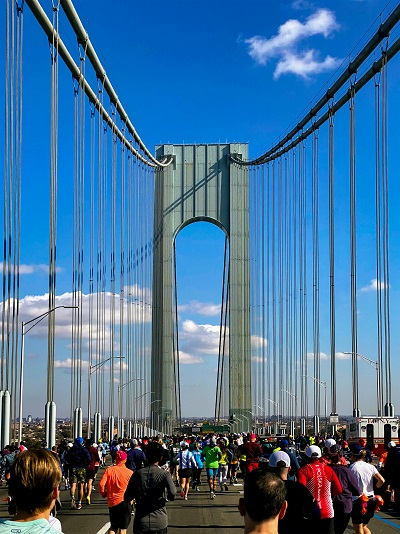

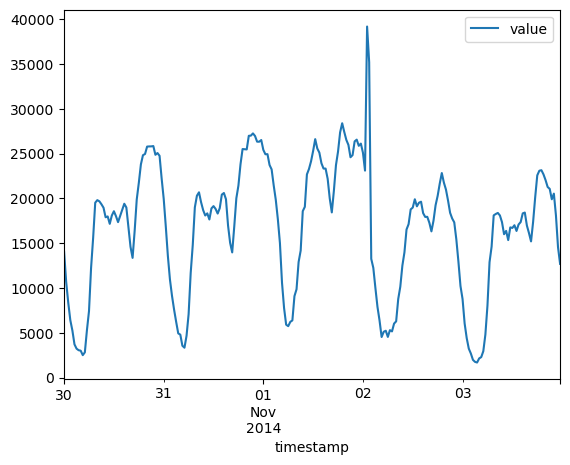

In [10]:
df.loc["2014-10-30":"2014-11-03"].plot()
plt.show()

The occurrence of a New York City Marathon led to a surge.There is a spike as there was a New York City Marathon

### b. Thanksgiving

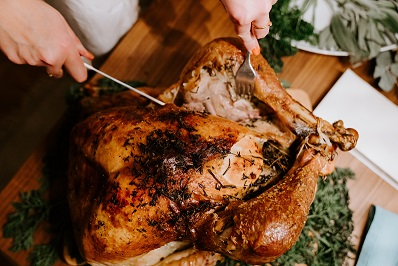

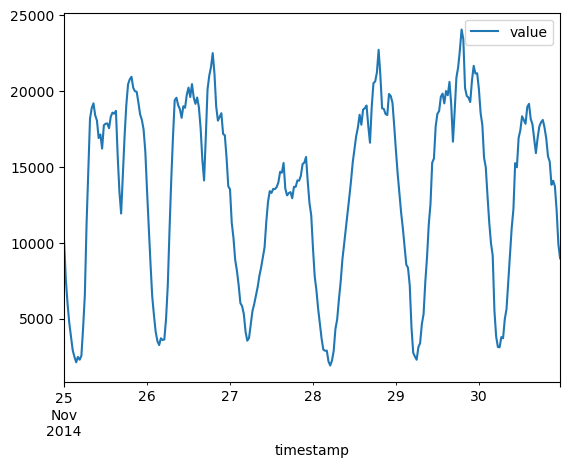

In [11]:
df.loc["2014-11-25":"2014-11-30"].plot()
plt.show()

The number of rides has been reduced due to the occurrence of Thanksgiving on the 27th.

### c. Snow Storm

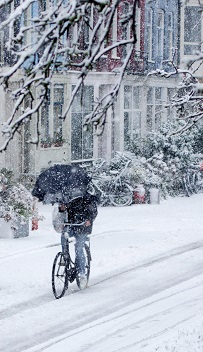

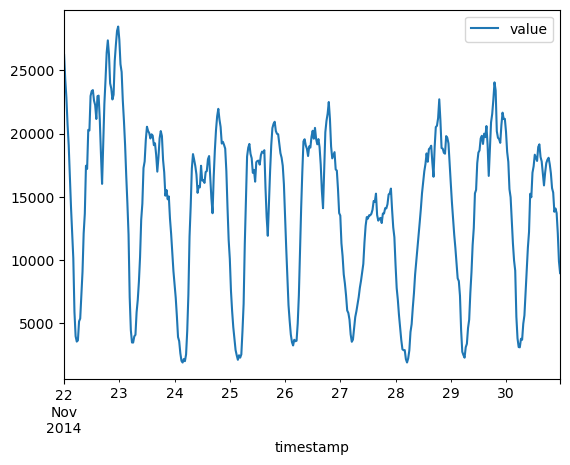

In [12]:
df.loc["2014-11-22":"2014-11-30"].plot()
plt.show()

Due to the presence of snow, there has been a decrease in the number of rides on the 27th.

### d. Chirstmas and New Year

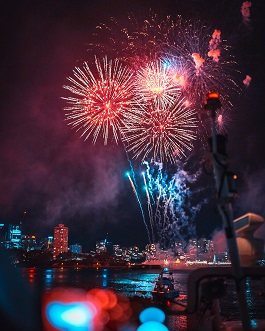

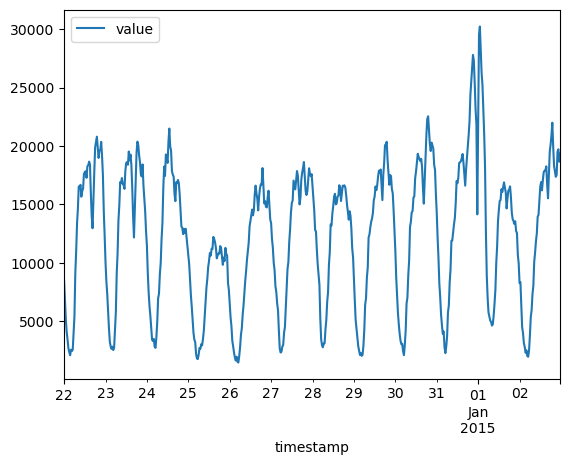

In [13]:
df.loc["2014-12-22":"2015-01-02"].plot()
plt.show()

On Christmas Day, which falls on the 25th of December, there is a decrease in the number of rides, whereas on the 1st of January, there is an increase in the number of rides in New York.

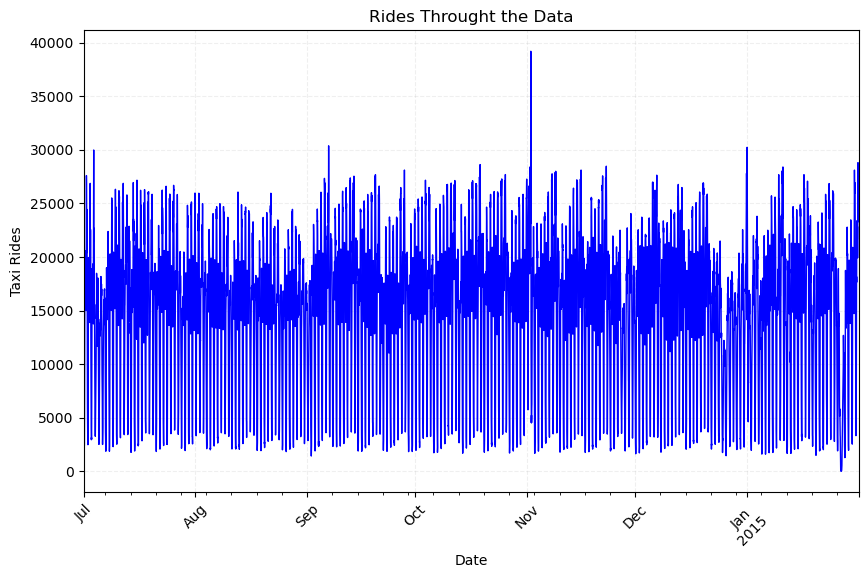

In [14]:
df['value'].plot(figsize=(10, 6), color='blue', linewidth=1)


plt.xlabel('Date')
plt.ylabel('Taxi Rides')
plt.title('Rides Throught the Data')


plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.2)

plt.show()


Let's see about the peak we get

In [15]:
df[df['value'] > 35000]

,value
timestamp,
2014-11-02 01:00:00,39197
2014-11-02 01:30:00,35212


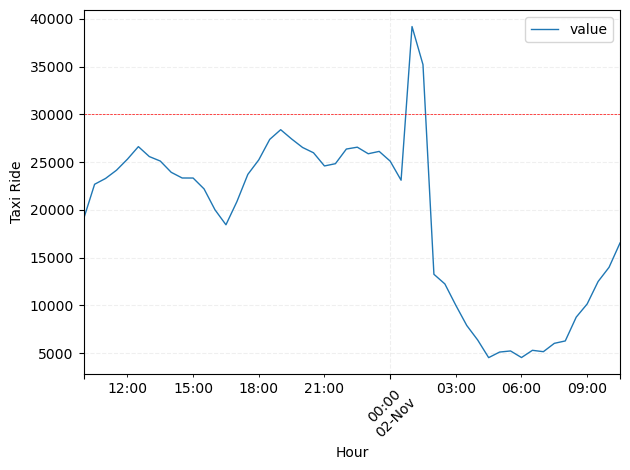

In [16]:
# Taking a closure look at the data

df.loc['2014-11-01 10:00:00':,].head(50).plot(linewidth = 1)

plt.xlabel('Hour')
plt.ylabel('Taxi Ride')
plt.xticks(rotation = 45)
plt.axhline(y = 30000, color = 'red', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.grid(linestyle = '--', alpha = 0.2)
plt.show()

We see something happened on 2 nov 2014 at 1am since there is a high volumne of rides during that hour

**This is the New York Marathon**

In [17]:
# Capping these outlier to 20000
df[df['value'] > 35000] = 20000

Let's add other time attributes to better visualize the data

In [18]:
df['day'] = df.index.day
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df.head()

,value,day,hour,weekday,month
timestamp,,,,,
2014-07-01 00:00:00,10844,1,0,1,7
2014-07-01 00:30:00,8127,1,0,1,7
2014-07-01 01:00:00,6210,1,1,1,7
2014-07-01 01:30:00,4656,1,1,1,7
2014-07-01 02:00:00,3820,1,2,1,7


Lets resample to downsample our data to number days and plot

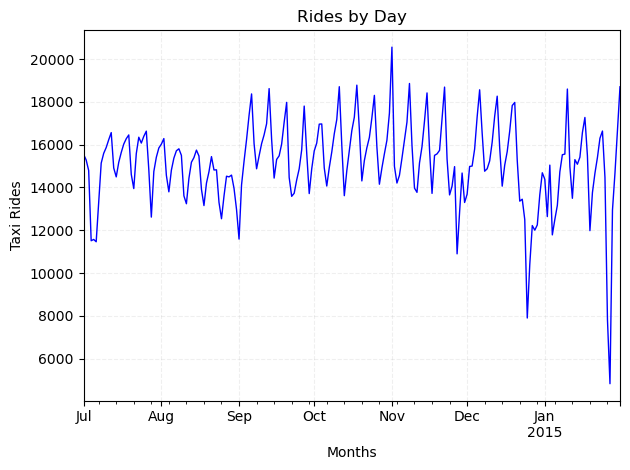

In [19]:
df_day = df['value'].resample('D').mean()
df_day.plot(linewidth = 1, color = 'blue')
plt.xlabel("Months")
plt.ylabel("Taxi Rides")
plt.title("Rides by Day")
plt.tight_layout()
plt.grid(linestyle = '--', alpha = 0.2)
plt.show()

The data displays a seasonal pattern, with two evident changepoints.
1. The first changepoint occurs in early September
2. The second occurs at the end of December.

The seasonal trend suggests an increase in taxi rides after August, potentially due to the winter season, while higher variance in January may be influenced by daily weather conditions.

Lets see Data across each month and day

In [20]:
df

,value,day,hour,weekday,month
timestamp,,,,,
2014-07-01 00:00:00,10844,1,0,1,7
2014-07-01 00:30:00,8127,1,0,1,7
2014-07-01 01:00:00,6210,1,1,1,7
2014-07-01 01:30:00,4656,1,1,1,7
2014-07-01 02:00:00,3820,1,2,1,7
...,...,...,...,...,...
2015-01-31 21:30:00,24670,31,21,5,1
2015-01-31 22:00:00,25721,31,22,5,1
2015-01-31 22:30:00,27309,31,22,5,1


In [21]:
import calendar

In [22]:
calendar.month_name[3]

'March'

In [23]:
df["month"] = df["month"].apply(lambda x: calendar.month_name[x])

In [24]:
df['month']

timestamp
2014-07-01 00:00:00       July
2014-07-01 00:30:00       July
2014-07-01 01:00:00       July
2014-07-01 01:30:00       July
2014-07-01 02:00:00       July
                        ...   
2015-01-31 21:30:00    January
2015-01-31 22:00:00    January
2015-01-31 22:30:00    January
2015-01-31 23:00:00    January
2015-01-31 23:30:00    January
Name: month, Length: 10320, dtype: object

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3628\1958305651.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3628\1958305651.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3628\1958305651.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3628\1958305651.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3628\1958305651.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_3628\1958305651.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\Ahmed\AppData\Local\Temp\ipyker

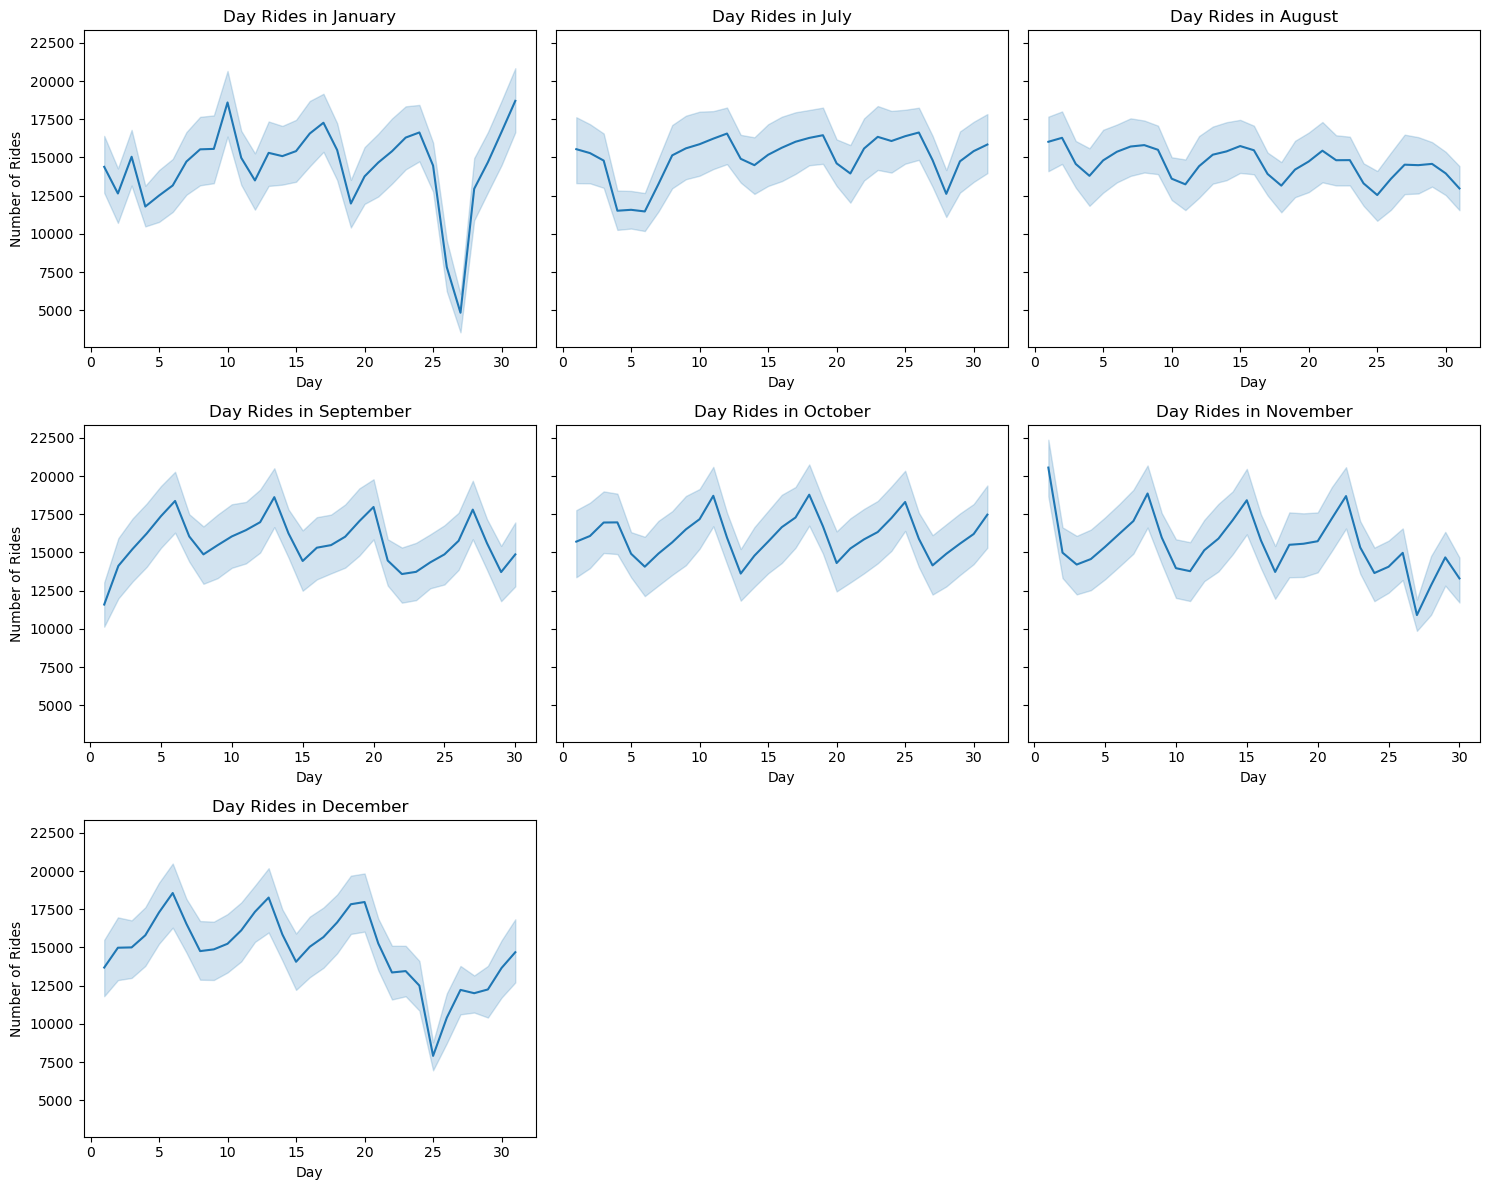

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all unique months (as strings) sorted by actual calendar order
all_months = list(calendar.month_name)[1:]  # Skip empty string at index 0
months = [m for m in all_months if m in df['month'].unique()]
num_months = len(months)

# Set up subplot grid
cols = 3
rows = math.ceil(num_months / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4), sharey=True)
axes = axes.flatten()

# Plot each month in its subplot
for i, month in enumerate(months):
    spesefic_month = df[df['month'] == month]

    sns.lineplot(
        ax=axes[i],
        x="day",
        y="value",
        data=spesefic_month,
        palette='bright'
    )
    axes[i].set_title(f"Day Rides in {month}")
    axes[i].set_xlabel("Day")
    axes[i].set_ylabel("Number of Rides")

# Remove extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [26]:
df_numeric = df.select_dtypes(include='number')
df = df_numeric.resample('D').mean()


In [27]:
df.head()

,value,day,hour,weekday
timestamp,,,,
2014-07-01,15540.979167,1.0,11.5,1.0
2014-07-02,15284.166667,2.0,11.5,2.0
2014-07-03,14794.625000,3.0,11.5,3.0
2014-07-04,11511.770833,4.0,11.5,4.0
2014-07-05,11572.291667,5.0,11.5,5.0


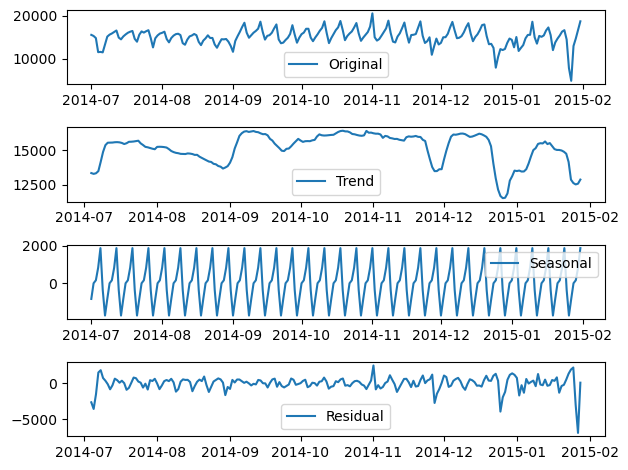

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposed = seasonal_decompose(df["value"], model = 'additive')


# Access the individual components
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the original time series
plt.subplot(411)
plt.plot(df["value"], label='Original')
plt.legend()

# Plot the trend component
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


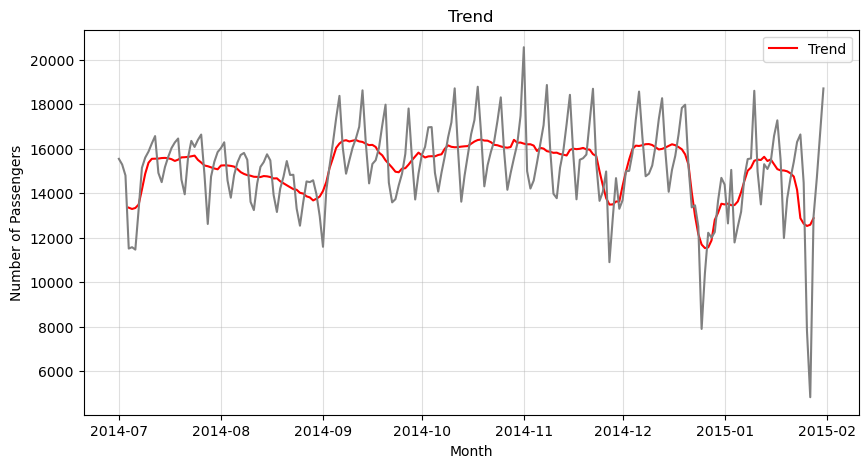

In [29]:
# Plot the seasonally adjusted trend
plt.figure(figsize=(10, 5))
plt.plot(trend, color = 'red', label = 'Trend')
plt.plot(df.index, df['value'], color='gray')
plt.ylabel('Number of Passengers')
plt.xlabel('Month')
plt.title('Trend')
plt.grid(alpha = 0.4)
plt.legend()
plt.show()

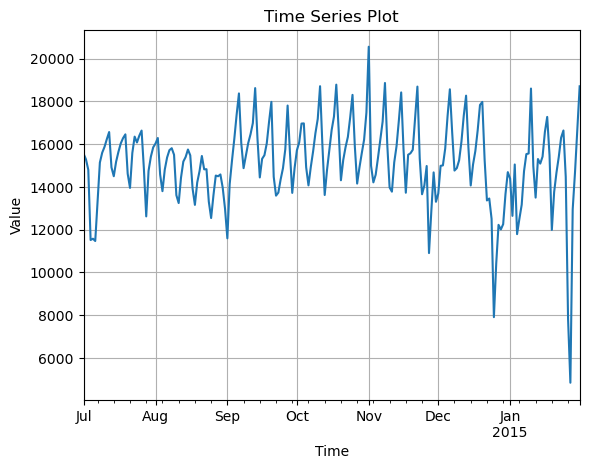

--- Augmented Dickey-Fuller Test ---
Test Statistic: -3.4933955529855125
p-value: 0.00815833915043183
Number of Lags Used: 9
Number of Observations Used: 205
Critical Values:
   1%: -3.4626576734812318
   5%: -2.8757444215841326
   10%: -2.5743412314098753

stationary 


In [30]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

df['value'].plot(title='Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


result = adfuller(df['value'])


print('--- Augmented Dickey-Fuller Test ---')
print('Test Statistic:', result[0])
print('p-value:', result[1])
print('Number of Lags Used:', result[2])
print('Number of Observations Used:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] < 0.05 and result[0] < result[4]['5%']:
    print('\nstationary ')
else:
    print('not stationary ')


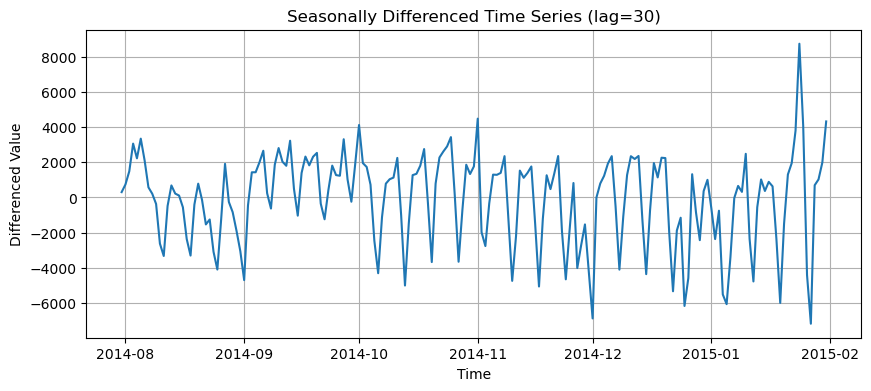

--- Augmented Dickey-Fuller Test After Seasonal Differencing ---
Test Statistic: -3.231518693440562
p-value: 0.018231223312149387
Number of Lags Used: 9
Number of Observations Used: 175
Critical Values:
   1%: -3.4682803641749267
   5%: -2.8782017240816327
   10%: -2.5756525795918366
Stationary


In [31]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# 1. Apply Seasonal Differencing (assuming a monthly seasonality = 30 days)
df['seasonal_diff'] = df['value'] - df['value'].shift(30)

# 2. Drop NaN values created by the shift
seasonal_diff = df['seasonal_diff'].dropna()

# 3. Plot the differenced time series
plt.figure(figsize=(10, 4))
plt.plot(seasonal_diff)
plt.title('Seasonally Differenced Time Series (lag=30)')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.grid(True)
plt.show()

# 4. Apply Augmented Dickey-Fuller Test on the differenced series
result = adfuller(seasonal_diff)

# 5. Print the ADF test results
print('--- Augmented Dickey-Fuller Test After Seasonal Differencing ---')
print('Test Statistic:', result[0])
print('p-value:', result[1])
print('Number of Lags Used:', result[2])
print('Number of Observations Used:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# 6. Interpretation
if result[1] < 0.05 and result[0] < result[4]['5%']:
    print('Stationary')
else:
    print('not Stationary')


In [32]:
# seasonal_diff.to_csv("all_data.csv", index="True")

In [33]:
seasonal_diff

timestamp
2014-07-31     304.083333
2014-08-01     740.000000
2014-08-02    1489.041667
2014-08-03    3060.083333
2014-08-04    2223.854167
                 ...     
2015-01-27   -7170.208333
2015-01-28     697.083333
2015-01-29    1026.458333
2015-01-30    1990.354167
2015-01-31    4319.000000
Freq: D, Name: seasonal_diff, Length: 185, dtype: float64

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


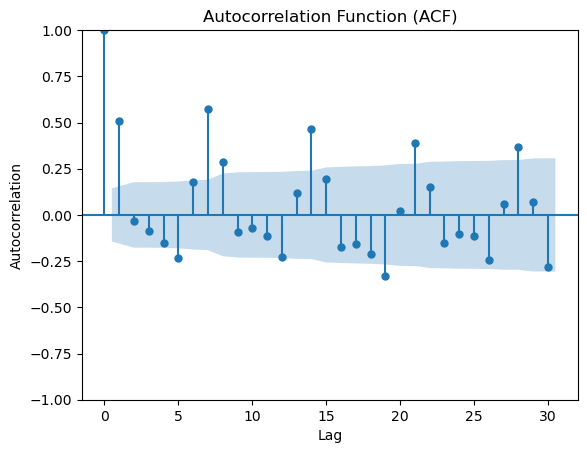

In [35]:
data = seasonal_diff

plot_acf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
# plt.grid(alpha = 0. 4)
plt.show()


In [36]:
# q = 1
# p = 4 or 6

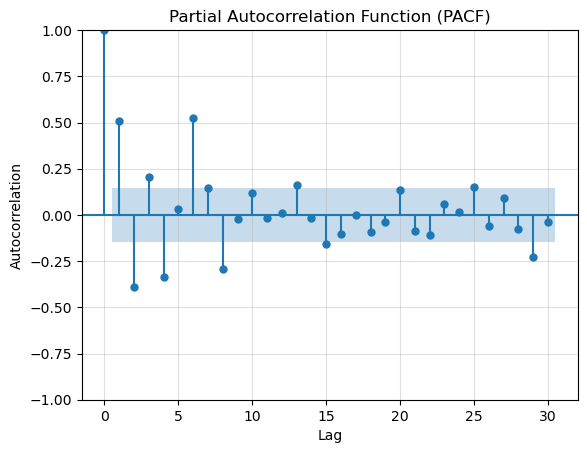

In [37]:
data = seasonal_diff

plot_pacf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(alpha = 0.4)
plt.show()


In [38]:
train = data[:round(len(data)*80/100)]
test = data[round(len(data)*80/100):]
test.head()

timestamp
2014-12-26   -4575.416667
2014-12-27    1321.250000
2014-12-28    -846.104167
2014-12-29   -2423.687500
2014-12-30     361.416667
Freq: D, Name: seasonal_diff, dtype: float64

In [39]:
type(train)

pandas.core.series.Series

In [40]:
train_df = train.to_frame(name="value")
test_df = test.to_frame(name='value')
data = data.to_frame(name="value")


In [41]:
test.head()

timestamp
2014-12-26   -4575.416667
2014-12-27    1321.250000
2014-12-28    -846.104167
2014-12-29   -2423.687500
2014-12-30     361.416667
Freq: D, Name: seasonal_diff, dtype: float64

In [42]:
data.head()

,value
timestamp,
2014-07-31,304.083333
2014-08-01,740.000000
2014-08-02,1489.041667
2014-08-03,3060.083333
2014-08-04,2223.854167


In [43]:
type(train_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [44]:
from statsmodels.tsa.arima_model import ARIMA


In [45]:
test.index

DatetimeIndex(['2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31', '2015-01-01', '2015-01-02',
               '2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-11', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16', '2015-01-17', '2015-01-18',
               '2015-01-19', '2015-01-20', '2015-01-21', '2015-01-22',
               '2015-01-23', '2015-01-24', '2015-01-25', '2015-01-26',
               '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30',
               '2015-01-31'],
              dtype='datetime64[ns]', name='timestamp', freq='D')

In [46]:
train_df.head()

,value
timestamp,
2014-07-31,304.083333
2014-08-01,740.000000
2014-08-02,1489.041667
2014-08-03,3060.083333
2014-08-04,2223.854167


In [47]:
from statsmodels.tsa.arima.model import ARIMA


In [48]:

# Fit ARIMA model 
# order (p, d, q)
model = ARIMA(train_df['value'], order=(6, 1, 1))
model_fit = model.fit()

# Predict for test period
prediction = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Add prediction column
data.loc[test.index, 'arimaPred'] = prediction

# Show result
print(data.tail())

                  value    arimaPred
timestamp                           
2015-01-27 -7170.208333 -1310.466063
2015-01-28   697.083333 -2059.763284
2015-01-29  1026.458333 -3805.449718
2015-01-30  1990.354167 -2629.430411
2015-01-31  4319.000000 -1632.227377


c:\Users\Ahmed\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [49]:
import os 
import pickle
os.makedirs("models", exist_ok=True)  # Ensure the 'models' directory exists
with open('models/arima_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)

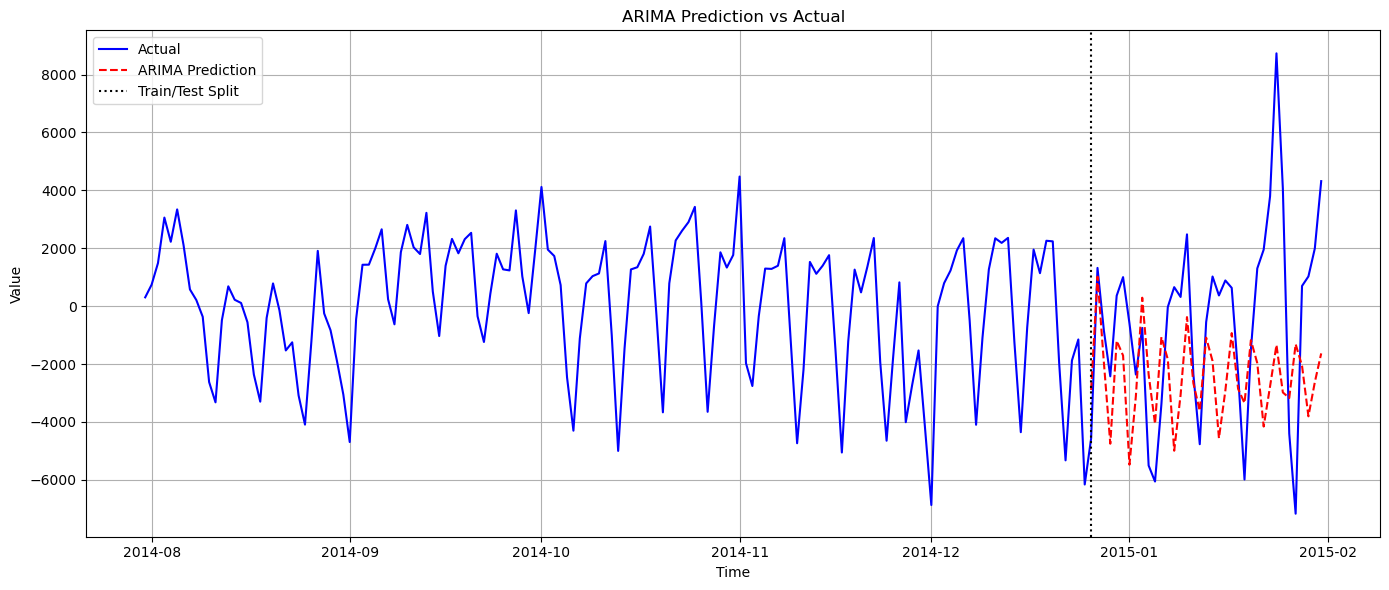

In [50]:

plt.figure(figsize=(14,6))

# Plot the actual values
plt.plot(data.index, data["value"], label="Actual", color='blue')

# Plot the ARIMA predictions (only where they exist)
plt.plot(data.index, data["arimaPred"], label="ARIMA Prediction", color='red', linestyle='--')

# Highlight the train-test split if desired
plt.axvline(x=test.index[0], color='black', linestyle=':', label='Train/Test Split')

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("ARIMA Prediction vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Drop NaNs from prediction column
actual = data.loc[test.index, "value"]
predicted = data.loc[test.index, "arimaPred"].dropna()

# Ensure alignment (some early predictions might be NaN)
actual = actual.loc[predicted.index]

# MAE
mae = mean_absolute_error(actual, predicted)

# RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))

# MAPE
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

# R2 Score
r2 = r2_score(actual, predicted)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 3095.73
Root Mean Squared Error (RMSE): 3833.05
Mean Absolute Percentage Error (MAPE): 406.37%
R-squared (R²): -0.3766


In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model with weekly seasonality (7-day period)
sarima_model = SARIMAX(train_df['value'], order=(6, 1, 1), seasonal_order=(6, 1, 1, 7))
sarima_fit = sarima_model.fit()

# Predict
sarima_pred = sarima_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Add predictions to your DataFrame
data.loc[test.index, 'sarimaPred'] = sarima_pred


c:\Users\Ahmed\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ahmed\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [53]:

with open('models/sarima_model_7.pkl', 'wb') as f:
    pickle.dump(model_fit, f)

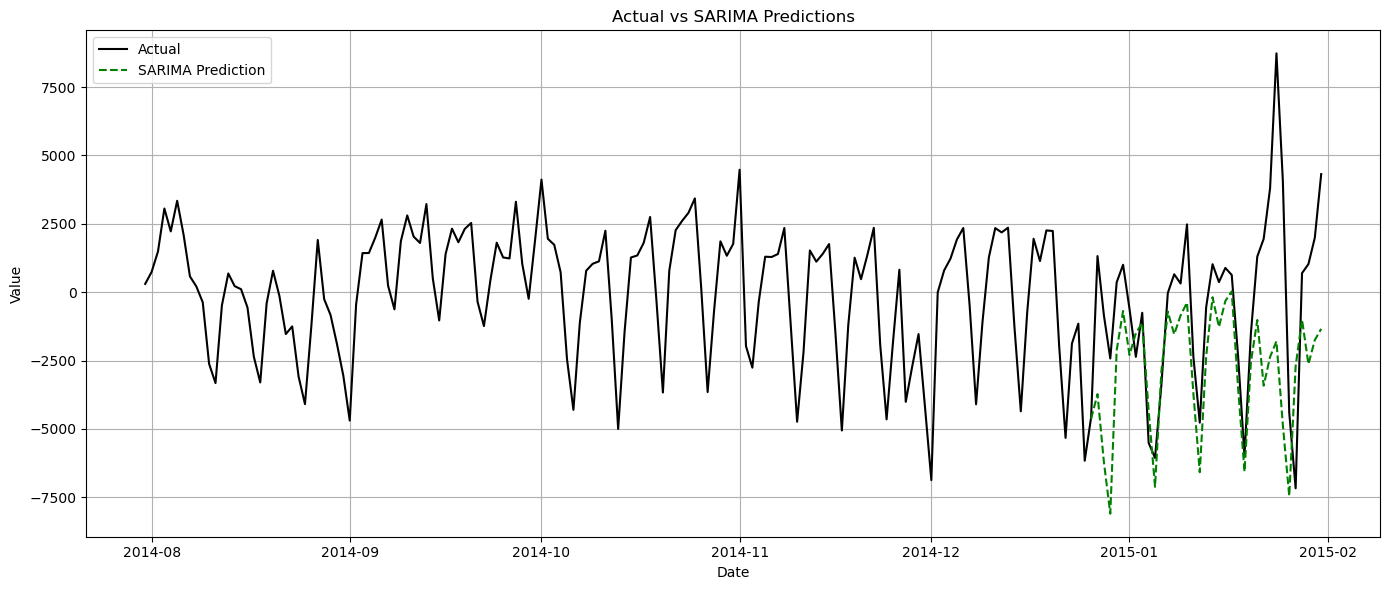

In [54]:

plt.figure(figsize=(14, 6))
plt.plot(data['value'], label='Actual', color='black')
plt.plot(data['sarimaPred'], label='SARIMA Prediction', color='green', linestyle='--')

plt.title('Actual vs SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Drop NaNs from SARIMA prediction column
actual = data.loc[test.index, "value"]
predicted = data.loc[test.index, "sarimaPred"].dropna()

# Ensure alignment
actual = actual.loc[predicted.index]

# MAE
mae = mean_absolute_error(actual, predicted)

# RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))

# MAPE
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

# R2
r2 = r2_score(actual, predicted)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 2725.97
Root Mean Squared Error (RMSE): 3631.86
Mean Absolute Percentage Error (MAPE): 241.54%
R-squared (R²): -0.2359


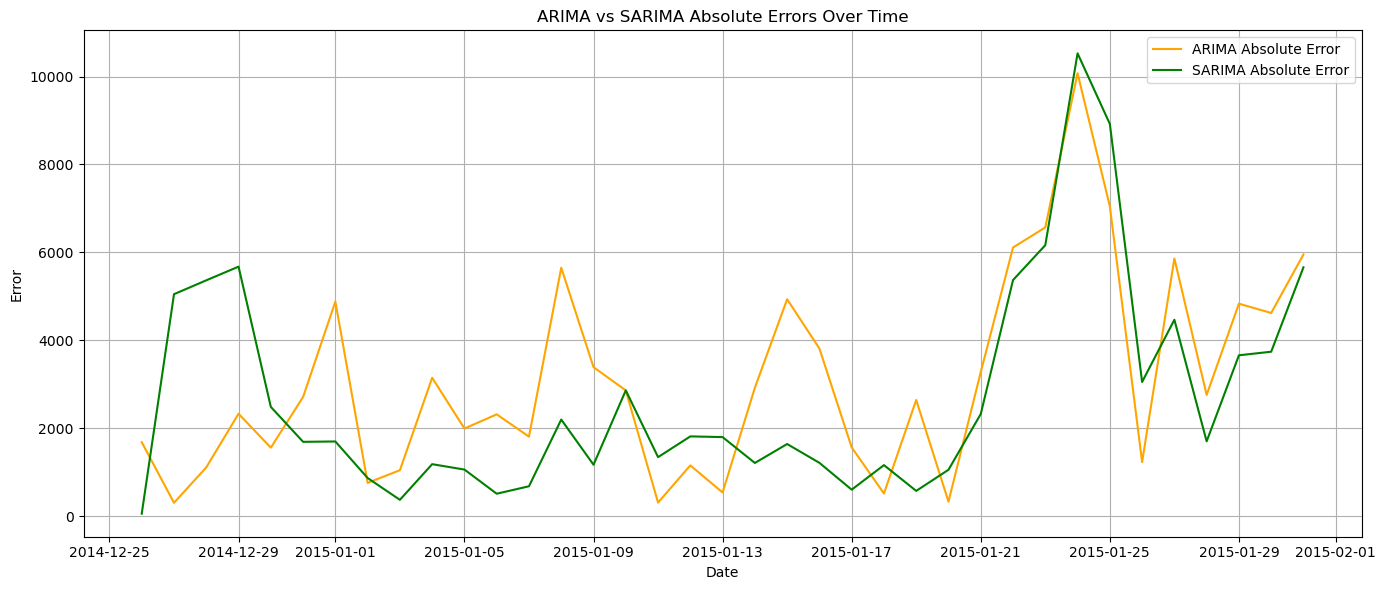

In [56]:


# Calculate absolute errors for ARIMA and SARIMA
data['arima_error'] = np.abs(data['value'] - data['arimaPred'])
data['sarima_error'] = np.abs(data['value'] - data['sarimaPred'])

# Plot absolute errors for both ARIMA and SARIMA
plt.figure(figsize=(14, 6))
plt.plot(data['arima_error'], label='ARIMA Absolute Error', color='orange')
plt.plot(data['sarima_error'], label='SARIMA Absolute Error', color='green')

# Add title and labels
plt.title('ARIMA vs SARIMA Absolute Errors Over Time')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Modelling lstm

In [57]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

values = df['value'].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values.reshape(-1,1))


In [58]:
len(df['value'])

215

In [59]:
train_size = int(len(scaled_values) * 0.8)
train_data = scaled_values[:train_size]
test_data = scaled_values[train_size:]


In [60]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)


In [61]:
sequence_length = 10  
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [62]:
X_train.shape

(162, 10, 1)

In [ ]:
from tensorflow.keras.losses import MeanSquaredError
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss=MeanSquaredError())


c:\Users\Ahmed\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
model.fit(X_train, y_train, epochs=50, batch_size=32)
model.save('models/lstm_model.h5')
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)

# Print the predicted and actual values
for i in range(len(predicted_values)):
    print('Predicted:', predicted_values[i], 'Actual:', actual_values[i])

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0078
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0072
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0074
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0086
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0076
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0082
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0079
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0081
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0073
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0079
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0081
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0069
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0091
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0194
Mean Squared Error: 0.01936189830303192
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: [14294.098] Actual: [13659.6875]
Predicted: [14233.776] Actual: [14686.27083333]
Predicted: [14093.681] Actual: [14383.47916667]
Predicted: [13593.061] Actual: [12639.91666667]
Predicted: [12910.231] Actual: [15044.0625]
Predicted: [13757.412] Actual: [11785.60416667]
Predicted: [13130.708] Actual: [12502.75]
Predicted: [13503.233] Actual: [13164.10416667]
Predicted: [13914.463] Actual: [14729.47916667]
Predicted: [14639.259] Actual: [15529.5]
Predicted: [15096.5625] Actual: [15559.14583333]
Predicted: [14865.177] Actual: [18597.16666667]
Predicted: [15388.987] Actual: [14973.4375]
Predicted: [14524.858] Actual: [13494.625]
Predicted: [14198.381] Actual: [15299.9375]
Predicted: [15048.042] Actual: [15085.39583333]
Predicted: [15401.869] Actual: [15412.89583333]
Predicted: [15691.74] Actual: [16564.45833333]
Predicted: [16140.7705] Actual: [17269.

## Forecasting

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


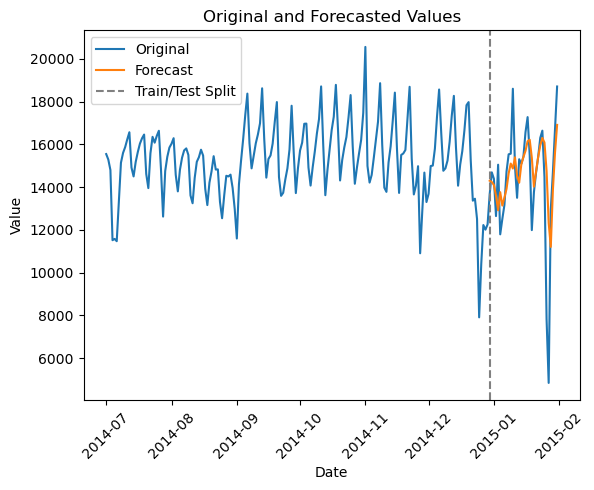

In [73]:
import matplotlib.pyplot as plt

# Plotting the original values
plt.plot(df['value'], label='Original')

# Plotting the forecasted values

predictions = model.predict(X_train)

plt.plot(data.index[-len(predicted_values):], predicted_values, label='Forecast')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original and Forecasted Values')
plt.axvline(data.index[-len(predicted_values)], color='grey', linestyle='--', label='Train/Test Split')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Flatten the arrays in case they're 2D
predicted_values = predicted_values.flatten()
actual_values = actual_values.flatten()

# Calculate MAE
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Calculate R²
r2 = r2_score(actual_values, predicted_values)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 1770.44
Root Mean Squared Error (RMSE): 2644.90
Mean Absolute Percentage Error (MAPE): 16.91%
R-squared (R²): -0.0010


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Flatten the arrays in case they're 2D
predicted_values = predicted_values.flatten()
actual_values = actual_values.flatten()

# Calculate MAE
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Calculate R²
r2 = r2_score(actual_values, predicted_values)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 1695.85
Root Mean Squared Error (RMSE): 2703.43
Mean Absolute Percentage Error (MAPE): 17.00%
R-squared (R²): -0.0458
